<a href="https://colab.research.google.com/github/ojas12r/pbl4/blob/main/pbl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARKET REGIME DETECTION USING HMM

In [1]:
!pip install hmmlearn yfinance --quiet

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8")
sns.set()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.2 MB/s eta 0:00:00


In [2]:
symbol = "SPY"
data = yf.download(symbol, start="1993-01-01", end="2024-01-01")
data = data[['Close']]

data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Returns'].rolling(20).std()
data.dropna(inplace=True)

/tmp/ipython-input-1735637078.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="1993-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
train = data[:'2004-12-31']
test = data['2005-01-01':]

# Features: Returns + Volatility
features = ['Returns', 'Volatility']

scaler = StandardScaler()
X_train = scaler.fit_transform(train[features])
X_test = scaler.transform(test[features])

In [5]:
hmm_model = GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
    random_state=42
)

hmm_model.fit(X_train)

train.loc[:, 'Regime'] = hmm_model.predict(X_train)
test.loc[:, 'Regime'] = hmm_model.predict(X_test)


In [7]:
symbol = "SPY"
data = yf.download(symbol, start="1993-01-01", end="2024-01-01")

# Fix MultiIndex columns issue
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

data = data[['Close']].copy()

data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Returns'].rolling(20).std()

data.dropna(inplace=True)


/tmp/ipython-input-1953325285.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="1993-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
def apply_sma_strategy(df):
    df['SMA_10'] = df['Close'].rolling(10).mean()
    df['SMA_30'] = df['Close'].rolling(30).mean()
    df['Signal'] = 0
    df.loc[df['SMA_10'] > df['SMA_30'], 'Signal'] = 1
    df['Position'] = df['Signal'].shift(1)
    return df

train = apply_sma_strategy(train)
test = apply_sma_strategy(test)

In [12]:
print("Column Type:", type(data.columns))
print("Index Type:", type(data.index))
print(data.head())





Column Type: <class 'pandas.core.indexes.base.Index'>
Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Price           Close   Returns  Volatility
Date                                       
1993-03-01  24.431068 -0.002818    0.007853
1993-03-02  24.793127  0.014711    0.008364
1993-03-03  24.896580  0.004164    0.008394
1993-03-04  24.758654 -0.005555    0.008189
1993-03-05  24.689676 -0.002790    0.008153


In [13]:
symbol = "SPY"
data = yf.download(symbol, start="1993-01-01", end="2024-01-01")

data = data[['Close']].copy()

data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Returns'].rolling(20).std()

data.dropna(inplace=True)

# 🔥 IMPORTANT FIX
data.columns.name = None

print(data.head())


/tmp/ipython-input-1800767026.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="1993-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close   Returns Volatility
Ticker            SPY                     
Date                                      
1993-03-01  24.431068 -0.002818   0.007853
1993-03-02  24.793127  0.014711   0.008364
1993-03-03  24.896580  0.004164   0.008394
1993-03-04  24.758654 -0.005555   0.008189
1993-03-05  24.689676 -0.002790   0.008153


In [14]:
train = data.loc[:'2004-12-31'].copy()
test = data.loc['2005-01-01':].copy()


In [16]:
# Predict regimes on TRAIN data
train.loc[:, 'Regime'] = hmm_model.predict(X_train)


In [17]:
print(train.columns)


MultiIndex([(     'Close', 'SPY'),
            (   'Returns',    ''),
            ('Volatility',    ''),
            (    'Regime',    '')],
           names=['Price', 'Ticker'])


In [18]:
symbol = "SPY"
data = yf.download(symbol, start="1993-01-01", end="2024-01-01")

# Keep only Close
data = data[['Close']].copy()

# Feature Engineering
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Returns'].rolling(20).std()

data.dropna(inplace=True)

# 🔥 CRITICAL FIX: Flatten columns
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

data.columns.name = None

print(data.columns)


/tmp/ipython-input-3796783701.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="1993-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Index(['Close', 'Returns', 'Volatility'], dtype='object')


In [19]:
train = data.loc[:'2004-12-31'].copy()
test = data.loc['2005-01-01':].copy()


In [20]:
train.loc[:, 'Regime'] = hmm_model.predict(X_train)
test.loc[:, 'Regime'] = hmm_model.predict(X_test)


In [21]:
regime_stats = train.groupby('Regime')[['Returns','Volatility']].mean()


In [22]:
from sklearn.preprocessing import StandardScaler

features = ['Returns', 'Volatility']

scaler = StandardScaler()

X_train = scaler.fit_transform(train[features])
X_test = scaler.transform(test[features])


In [23]:
from hmmlearn.hmm import GaussianHMM

hmm_model = GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
    random_state=42
)

hmm_model.fit(X_train)


GaussianHMM(covariance_type='full', n_components=3, n_iter=1000,
            random_state=42)

In [24]:
train.loc[:, 'Regime'] = hmm_model.predict(X_train)
test.loc[:, 'Regime'] = hmm_model.predict(X_test)

print("Regime column added successfully.")
print(train.head())


Regime column added successfully.
                Close   Returns  Volatility  Regime
Date                                               
1993-03-01  24.431068 -0.002818    0.007853       1
1993-03-02  24.793127  0.014711    0.008364       1
1993-03-03  24.896580  0.004164    0.008394       1
1993-03-04  24.758654 -0.005555    0.008189       1
1993-03-05  24.689676 -0.002790    0.008153       1


In [25]:
regime_stats = train.groupby('Regime')[['Returns','Volatility']].mean()

print("\nRegime Statistics (Training Data)")
print(regime_stats)

low_vol_regime = regime_stats['Volatility'].idxmin()

print("\nLow Volatility Regime Identified As:", low_vol_regime)



Regime Statistics (Training Data)
         Returns  Volatility
Regime                      
0       0.000767    0.006188
1      -0.000063    0.010604
2       0.000391    0.017241

Low Volatility Regime Identified As: 0


In [26]:
regime_stats = train.groupby('Regime')[['Returns','Volatility']].mean()

print("\nRegime Statistics (Training Data)")
print(regime_stats)

low_vol_regime = regime_stats['Volatility'].idxmin()

print("\nLow Volatility Regime Identified As:", low_vol_regime)



Regime Statistics (Training Data)
         Returns  Volatility
Regime                      
0       0.000767    0.006188
1      -0.000063    0.010604
2       0.000391    0.017241

Low Volatility Regime Identified As: 0


In [27]:
def apply_sma_strategy(df):
    df['SMA_10'] = df['Close'].rolling(10).mean()
    df['SMA_30'] = df['Close'].rolling(30).mean()

    df['Signal'] = 0
    df.loc[df['SMA_10'] > df['SMA_30'], 'Signal'] = 1

    df['Position'] = df['Signal'].shift(1)

    return df

train = apply_sma_strategy(train)
test = apply_sma_strategy(test)


In [28]:
test['Filtered_Position'] = np.where(
    test['Regime'] == low_vol_regime,
    test['Position'],
    0
)


In [29]:
test['Strategy_Returns'] = test['Position'] * test['Returns']
test['Filtered_Returns'] = test['Filtered_Position'] * test['Returns']

test['Cumulative_Market'] = np.exp(test['Returns'].cumsum())
test['Cumulative_Strategy'] = np.exp(test['Strategy_Returns'].cumsum())
test['Cumulative_Filtered'] = np.exp(test['Filtered_Returns'].cumsum())


In [30]:
def performance(returns, name):
    sharpe = np.sqrt(252) * returns.mean() / returns.std()
    total_return = np.exp(returns.sum()) - 1

    cum = np.exp(returns.cumsum())
    drawdown = (cum.cummax() - cum) / cum.cummax()
    max_dd = drawdown.max()

    print(f"\n{name}")
    print("Total Return:", round(total_return*100,2), "%")
    print("Sharpe Ratio:", round(sharpe,2))
    print("Max Drawdown:", round(max_dd*100,2), "%")

performance(test['Strategy_Returns'], "SMA Strategy")
performance(test['Filtered_Returns'], "SMA + HMM Filter")



SMA Strategy
Total Return: 157.42 %
Sharpe Ratio: 0.44
Max Drawdown: 28.38 %

SMA + HMM Filter
Total Return: 265.47 %
Sharpe Ratio: 1.1
Max Drawdown: 10.48 %


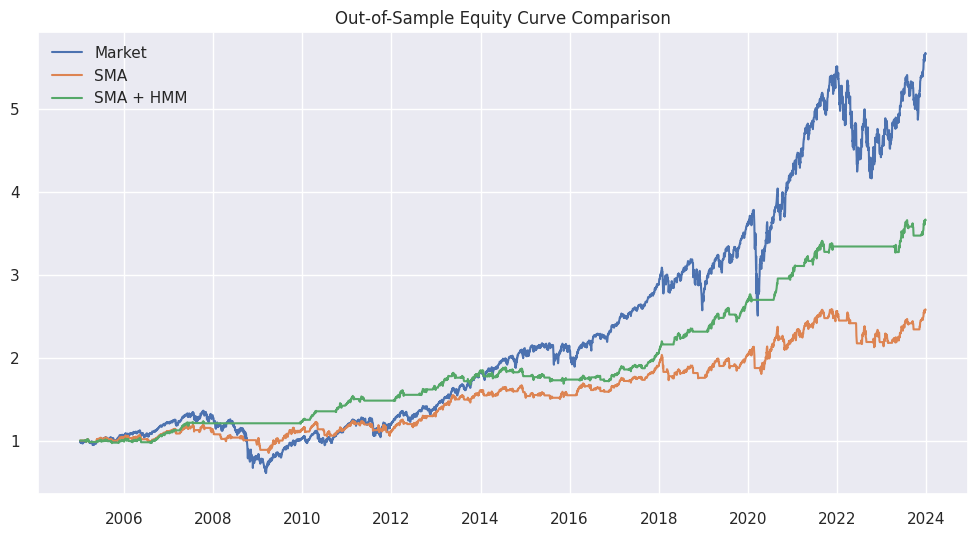

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test['Cumulative_Market'], label='Market')
plt.plot(test['Cumulative_Strategy'], label='SMA')
plt.plot(test['Cumulative_Filtered'], label='SMA + HMM')
plt.legend()
plt.title("Out-of-Sample Equity Curve Comparison")
plt.show()


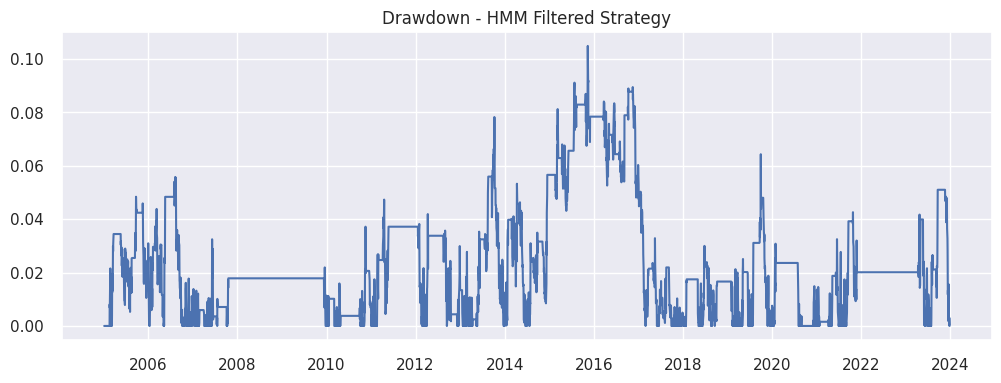

In [32]:
cum = test['Cumulative_Filtered']
drawdown = (cum.cummax() - cum) / cum.cummax()

plt.figure(figsize=(12,4))
plt.plot(drawdown)
plt.title("Drawdown - HMM Filtered Strategy")
plt.show()


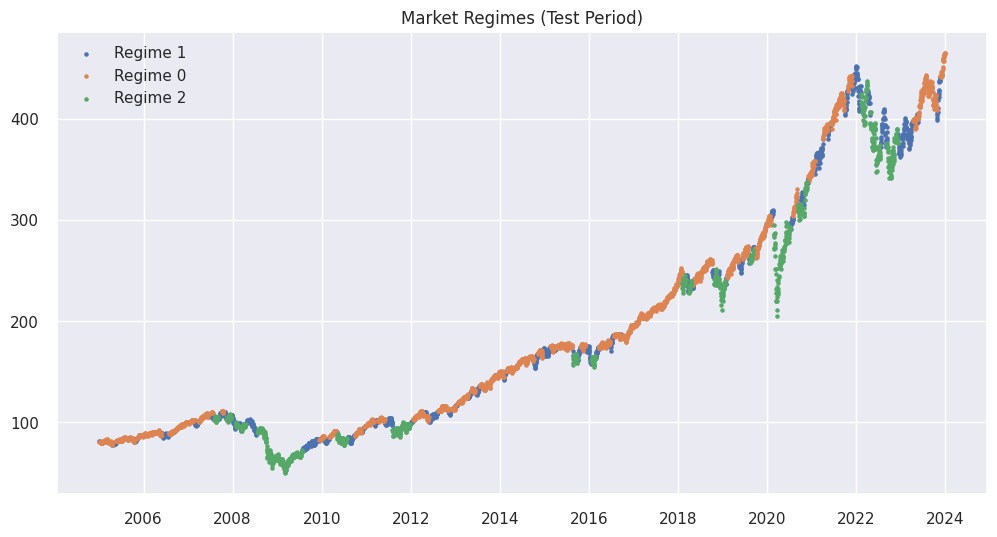

In [33]:
plt.figure(figsize=(12,6))

for regime in test['Regime'].unique():
    subset = test[test['Regime']==regime]
    plt.scatter(subset.index, subset['Close'], s=5, label=f'Regime {regime}')

plt.legend()
plt.title("Market Regimes (Test Period)")
plt.show()


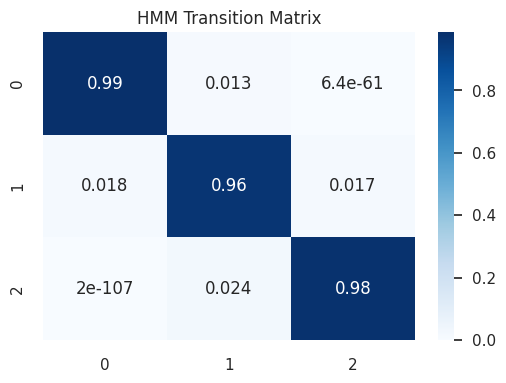

In [34]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(hmm_model.transmat_, annot=True, cmap="Blues")
plt.title("HMM Transition Matrix")
plt.show()
